In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
seed = 1
tf.random.set_seed(seed)
np.random.seed(seed)
df = pd.read_table('training_data.txt', sep='\t', skiprows=1, header=None)
subject = df.iloc[:, 0]
activity = df.iloc[:, 1]

df = df.iloc[:, 2:]
X = df.values
y = activity.values
y[y>=7]=0

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

df = pd.read_table('test_data.txt', sep='\t', skiprows=1, header=None)
subject = df.iloc[:, 0]
df = df.iloc[:, 1:]
X_test = df.values

In [ ]:
X_test = np.expand_dims(X_test, -1)
X_train = np.expand_dims(X_train, -1)
X_val = np.expand_dims(X_val, -1)
model = keras.models.Sequential([
    keras.layers.Conv1D(16, 3, activation="tanh", padding="same"),
    keras.layers.Conv1D(16, 3, activation="tanh", padding="same"),
    keras.layers.MaxPooling1D(3),

    keras.layers.Conv1D(64, 3, activation="tanh", padding="same"),
    keras.layers.Conv1D(64, 3, activation="tanh", padding="same"),
    keras.layers.MaxPooling1D(3),
    
    keras.layers.Conv1D(64, 3, activation="tanh", padding="same"),
    keras.layers.Conv1D(64, 3, activation="tanh", padding="same"),
    keras.layers.MaxPooling1D(3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(7, activation="softmax")
]) 
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30)


Epoch 1/30
195/195 [==============================] - 5s 10ms/step - loss: 0.5818 - accuracy: 0.7634
Epoch 2/30
195/195 [==============================] - 2s 9ms/step - loss: 0.1572 - accuracy: 0.9467
Epoch 3/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0987 - accuracy: 0.9667
Epoch 4/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0701 - accuracy: 0.9762
Epoch 5/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0558 - accuracy: 0.9805
Epoch 6/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0445 - accuracy: 0.9868
Epoch 7/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0432 - accuracy: 0.9847
Epoch 8/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0330 - accuracy: 0.9883
Epoch 9/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0278 - accuracy: 0.9899
Epoch 10/30
195/195 [==============================] - 2s 9ms/step - loss: 0.0479 - accuracy: 0.982

In [ ]:
## CNN
y_pred = np.argmax(model.predict(X_train), axis=-1)
count = np.sum(y_train==y_pred)
print(f"Train Data Accuracy: {count/len(y_train)}")


y_pred = np.argmax(model.predict(X_val), axis=-1)
count = np.sum(y_val==y_pred)
print(f"Validation Data Accuracy: {count/len(y_val)}")

Train Data Accuracy: 1.0
Validation Data Accuracy: 0.9864864864864865


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 561, 16)           64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 561, 16)           784       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 187, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 187, 64)           3136      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 187, 64)           12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 62, 64)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 62, 64)            1

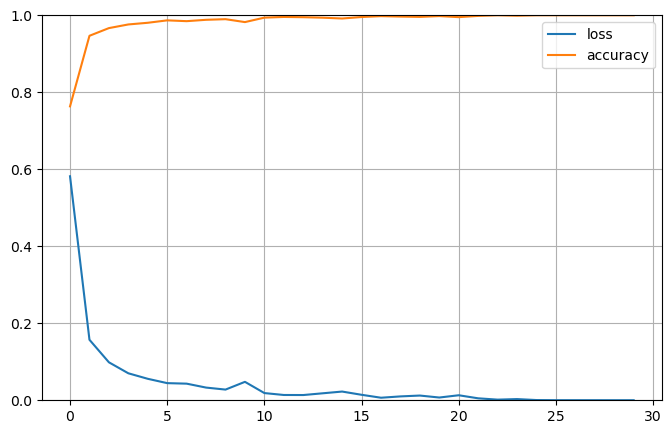

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show() 